# 🌾 Crop Yield Prediction using Linear Regression

## Problem Statement
Predict crop yield using environmental and agricultural factors like:
- Rainfall
- Temperature
- Pesticides usage
- Year
- Area

## Goal
Build a Linear Regression model to estimate crop yield per hectare.

## Why this project?
- Real world agriculture use case
- Government & AgriTech companies use similar models
- Strong portfolio project


# 📊 Dataset Description

Dataset: Crop Yield Prediction Dataset (Kaggle)

## Columns

| Column | Description |
|--------|-------------|
| Year | Year of production |
| Area | Country/Region |
| Item | Crop type |
| average_rain_fall_mm_per_year | Annual rainfall |
| pesticides_tonnes | Pesticide usage |
| avg_temp | Average temperature |
| hg/ha_yield | Yield per hectare (Target variable) |

## Target
hg/ha_yield



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [24]:
df = pd.read_csv('yield_df.csv')
df.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [25]:
df.head(50)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.00,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.00,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.00,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.00,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.00,15.36


In [26]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(25)


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


## Data cleaning

In [27]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [29]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [30]:
df.drop_duplicates(inplace=True)

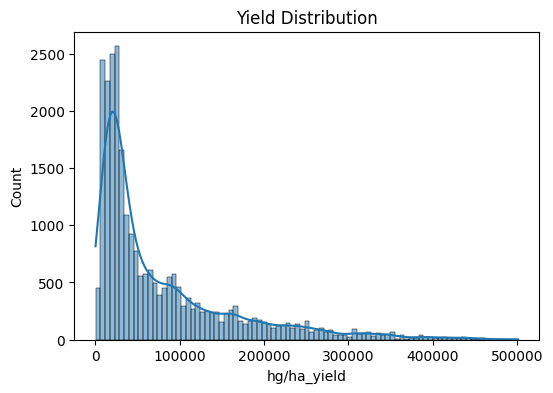

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(df['hg/ha_yield'], kde=True)
plt.title("Yield Distribution")
plt.show()


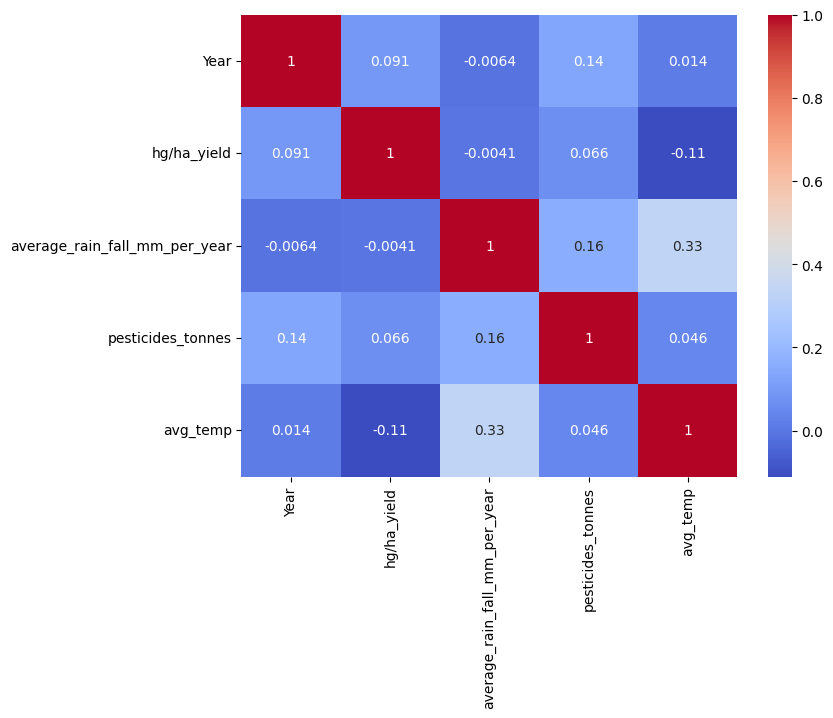

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


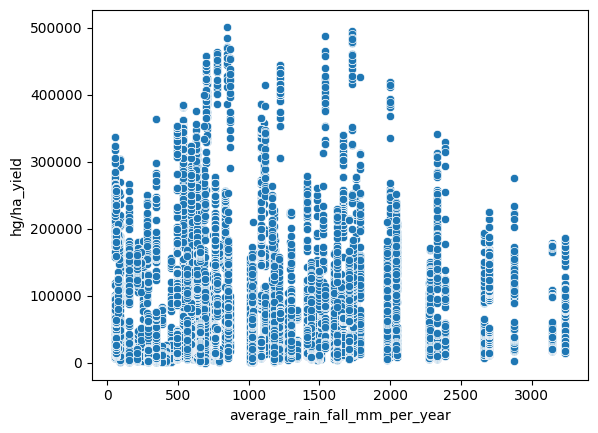

In [33]:
sns.scatterplot(x=df['average_rain_fall_mm_per_year'], y=df['hg/ha_yield'])
plt.show()


In [34]:
X = df.drop(['hg/ha_yield'],axis=1)
y = df['hg/ha_yield']

In [35]:
X.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.0,16.37
1,Albania,Potatoes,1990,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37
3,Albania,Sorghum,1990,1485.0,121.0,16.37
4,Albania,Soybeans,1990,1485.0,121.0,16.37


## Feature Encoding and Scaling
**One Hot Encoding for Columns which had lesser unique values and not ordinal**


In [36]:
df['Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [37]:
df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [38]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_features = X.select_dtypes(exclude="object").columns
numeric_transformer = StandardScaler()
cat_cols = ['Area','Item']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), cat_cols),
         ("StandardScaler", numeric_transformer, num_features)
    ],
    remainder='passthrough'
)

In [39]:
X = preprocessor.fit_transform(X).toarray()


In [40]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.637869,0.471388,-0.605681,-0.629302
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.637869,0.471388,-0.605681,-0.629302
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-1.637869,0.471388,-0.605681,-0.629302
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.637869,0.471388,-0.605681,-0.629302
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.637869,0.471388,-0.605681,-0.629302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.621866,-0.682816,-0.563235,-0.102845
25928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.621866,-0.682816,-0.563235,-0.102845
25929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.621866,-0.682816,-0.563235,-0.102845
25930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.621866,-0.682816,-0.563235,-0.102845


In [41]:
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.47138839,
        -0.60568074, -0.62930203],
       [ 0.        ,  0.        ,  0.        , ...,  0.47138839,
        -0.60568074, -0.62930203],
       [ 0.        ,  0.        ,  0.        , ...,  0.47138839,
        -0.60568074, -0.62930203],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.68281602,
        -0.56323486, -0.10284546],
       [ 0.        ,  0.        ,  0.        , ..., -0.68281602,
        -0.56323486, -0.10284546],
       [ 0.        ,  0.        ,  0.        , ..., -0.68281602,
        -0.56323486, -0.10284546]], shape=(25932, 113))

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((20745, 113), (5187, 113))

## Model Training And Model Selection

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [45]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae, rmse, r2_square

In [46]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
    "Xgboost Regressor":XGBRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 42138.7889
- Mean Absolute Error: 29450.4955
- R2 Score: 0.7514
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 42681.5235
- Mean Absolute Error: 29920.7419
- R2 Score: 0.7487




c:\Users\biyan\Documents\python\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.322e+10, tolerance: 1.482e+10
  model = cd_fast.enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 42139.6991
- Mean Absolute Error: 29434.5129
- R2 Score: 0.7514
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 42687.6346
- Mean Absolute Error: 29907.6035
- R2 Score: 0.7486


Ridge
Model performance for Training set
- Root Mean Squared Error: 42142.2526
- Mean Absolute Error: 29398.8066
- R2 Score: 0.7514
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 42691.4891
- Mean Absolute Error: 29875.8006
- R2 Score: 0.7485


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 8160.3767
- Mean Absolute Error: 3471.2651
- R2 Score: 0.9907
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11317.5209
- Mean Absolute Error: 4851.7983
- R2 Score: 0.9823


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
-

In [47]:
#Initialize few parameter for Hyperparamter tuning

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

dt_param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [49]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("Decision Tree",DecisionTreeRegressor(),dt_param),
                   ("RF", RandomForestRegressor(), rf_params),
                   ("XGboost",XGBRegressor(),xgboost_params)
                   
                   ]

In [ ]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\biyan\Documents\python\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
102 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\biyan\Documents\python\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\biyan\Documents\python\myenv\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\biyan\Documents\python\myenv\Lib\site-package

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\biyan\Documents\python\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
78 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\biyan\Documents\python\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\biyan\Documents\python\myenv\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\biyan\Documents\python\myenv\Lib\site-packages

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for Decision Tree -------------------
{'splitter': 'best', 'max_features': 'sqrt', 'max_depth': 25, 'criterion': 'squared_error'}
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for XGboost -------------------
{'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [53]:
## Retraining the models with best parameters
models = {
    "DecisionTree_Regressor": DecisionTreeRegressor(criterion='squared_error',max_depth=25,max_features='sqrt',splitter='best'),
    "Random_Forest_Regressor": RandomForestRegressor(n_estimators=1000, min_samples_split=2, max_features=8, max_depth=None, 
                                                     n_jobs=-1),
     "Xgboost_Regressor":XGBRegressor(n_estimators= 200,learning_rate=0.1,
                                     max_depth=20,colsample_bytree=1)
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

DecisionTree_Regressor
Model performance for Training set
- Root Mean Squared Error: 32344.3632
- Mean Absolute Error: 13635.1413
- R2 Score: 0.8536
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 39329.3611
- Mean Absolute Error: 18050.2551
- R2 Score: 0.7866


Random_Forest_Regressor
Model performance for Training set
- Root Mean Squared Error: 4356.9135
- Mean Absolute Error: 2303.5415
- R2 Score: 0.9973
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12980.9416
- Mean Absolute Error: 6579.0735
- R2 Score: 0.9768


Xgboost_Regressor
Model performance for Training set
- Root Mean Squared Error: 415.9188
- Mean Absolute Error: 203.4589
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10301.8674
- Mean Absolute Error: 3697.7668
- R2 Score: 0.9854




In [58]:
best_rf_model = models["Random_Forest_Regressor"]


In [59]:
import pickle 
pickle.dump(best_rf_model,open('rf_regressor.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))